In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
!pip install openpyxl


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Some Text
There are 2 sheets in this data file they are as follows:

Orders: contains the data about orders made by customers for any product. This table also contains information about customers like name, address, etc. and information about orders like product name, order-id, product category, etc.

Returns: contains information about the returned product with their order id and additional information.

In [3]:
orders = pd.read_excel("Superstore Dataset.xlsx")
returns = pd.read_excel("Superstore Dataset.xlsx", sheet_name = "Returns")

In [4]:
orders.head(3)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.8714


# Some Text
Number of each state's superstors and top 10

In [5]:
top10 = orders['State'].value_counts().head(10)

In [6]:
top10

California        1189
New York           672
Texas              565
Washington         337
Pennsylvania       335
Illinois           293
Ohio               293
Florida            212
North Carolina     159
Michigan           138
Name: State, dtype: int64

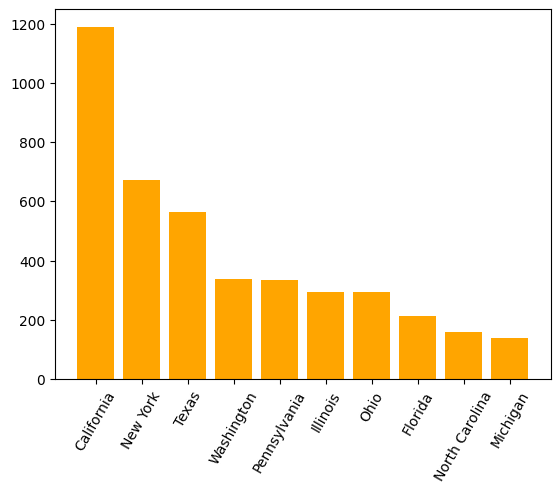

In [7]:
plt.bar(top10.index, top10.values, color = "orange")
plt.xticks(rotation = 60)
plt.show()

In [8]:
top20 = orders['State'].value_counts().head(20)
top20.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Illinois', 'Ohio', 'Florida', 'North Carolina', 'Michigan',
       'Tennessee', 'Georgia', 'Colorado', 'Arizona', 'Virginia', 'Indiana',
       'New Jersey', 'Wisconsin', 'Kentucky', 'Oregon'],
      dtype='object')

In [10]:
difference = 1000 - (top20.values)
top20_mean = top20.values.mean()
top20_mean = np.ones(shape = difference.shape) * top20_mean

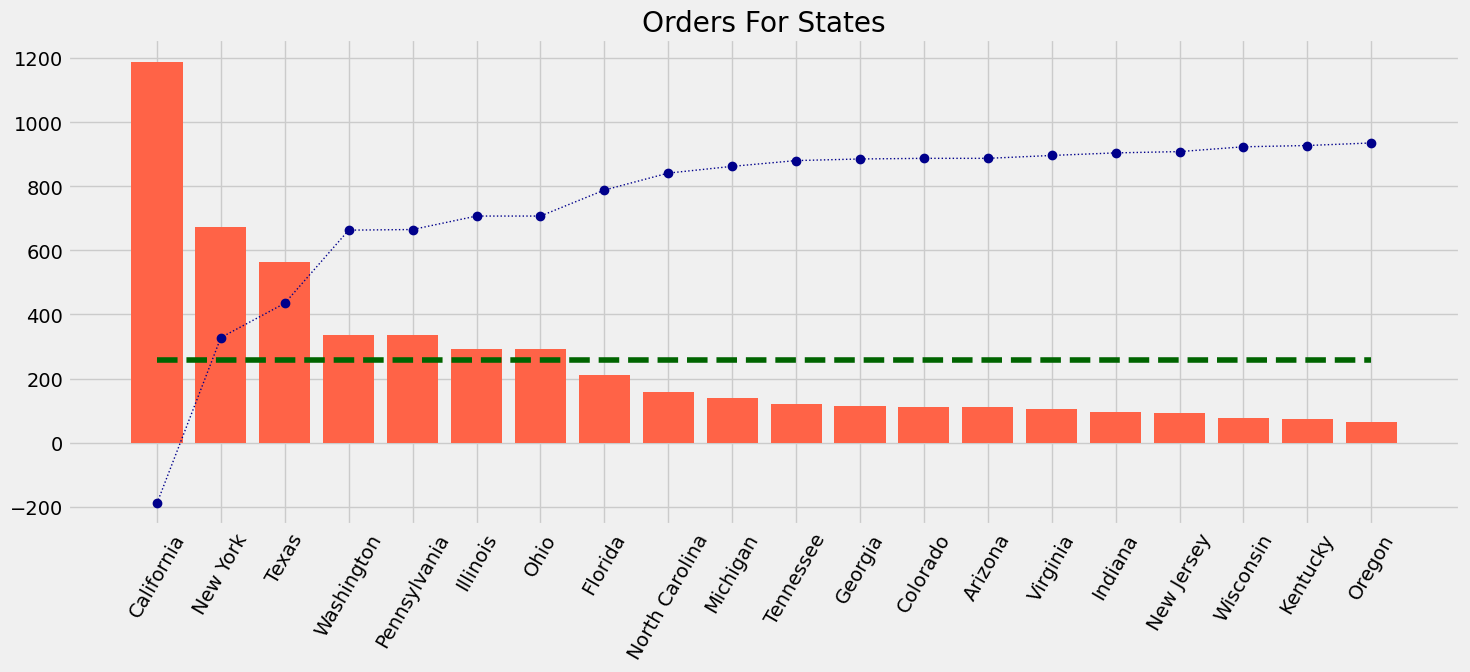

In [11]:
plt.figure(figsize = (16,6))
plt.bar(top20.index, top20.values, color = "tomato")
plt.plot(top20.index, difference, color = "darkblue", linestyle = "dotted", marker="o", linewidth=1)
plt.plot(top20.index, top20_mean, color= "darkgreen", linestyle = "dashed")
plt.title("Orders For States")
plt.xticks(rotation = 60)
plt.show()

In [12]:
categories = orders['Category'].value_counts()

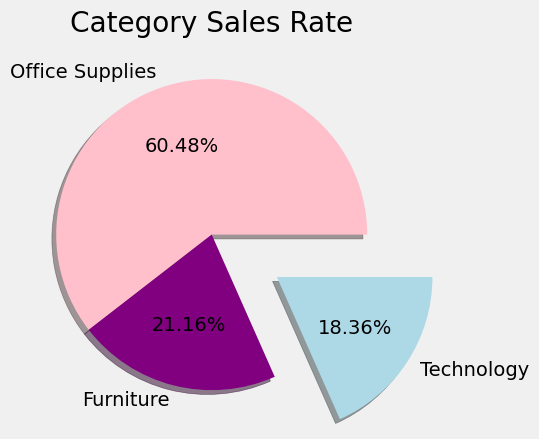

In [13]:
division = [0,0,0.5]
plt.pie(categories.values, labels = categories.index, autopct = "%1.2f%%", colors = ["pink", "purple", "lightblue"], shadow = True, explode = division)
plt.title("Category Sales Rate")
plt.show()

In [14]:
returns.head(3)

,Returned,Order ID
0,Yes,CA-2015-100762
1,Yes,CA-2015-100762
2,Yes,CA-2015-100762


In [19]:
orders.head(3)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.8714


In [15]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  800 non-null    object
 1   Order ID  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [18]:
len(returns['Returned'] == 'Yes')
len(returns['Returned'])

800

In [20]:
returns['Order ID'].value_counts()

CA-2018-100111    14
CA-2017-165330    11
CA-2016-164882     9
CA-2015-142769     8
US-2018-118087     8
                  ..
CA-2017-113341     1
CA-2018-137099     1
CA-2018-137085     1
CA-2018-136308     1
CA-2017-152814     1
Name: Order ID, Length: 296, dtype: int64